# Семинар №2
## Выполнила: Пилипенко Елизавета
## Группа: ИДБ-22-13

# Задание

Цель исследования — проанализировать данных о бронировании рейсов, полученный с веб-сайта «Ease My Trip».

«Ease My Trip» — это онлайн-платформа для планирования путешествий, которая предоставляет возможности покупки железнодорожных билетов и авиабилетов, бронирования гостиниц, такси и автобусов, приобретения туристических пакетов. Тщательное изучение набора данных поможет найти ценную информацию, которая может иметь большое значение для потенциальных пассажиров. В рамках задания мы будем работать с данными об авиаперелетах.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

dataset_path = './data/airlines.csv'

df = pd.read_csv(dataset_path)

### 1. Исследовать данные на наличие пропусков и дубликатов. 

In [7]:
df.shape

(300153, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
df.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
204457,204457,Indigo,6E-7216,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,22,6118
116667,116667,Vistara,UK-854,Bangalore,Evening,one,Night,Chennai,Economy,4.67,16,4672
171702,171702,Air_India,AI-543,Hyderabad,Morning,one,Evening,Kolkata,Economy,7.83,11,12118
160127,160127,Air_India,AI-541,Hyderabad,Evening,one,Afternoon,Mumbai,Economy,20.58,14,7774
178390,178390,Indigo,6E-7298,Hyderabad,Afternoon,one,Night,Chennai,Economy,8.25,26,5220
6099,6099,Vistara,UK-859,Delhi,Morning,one,Morning,Mumbai,Economy,23.58,31,5542
64174,64174,Air_India,AI-867,Mumbai,Night,one,Afternoon,Kolkata,Economy,17.00,17,4977
275638,275638,Air_India,AI-698,Hyderabad,Night,one,Morning,Delhi,Business,12.00,19,39499
156540,156540,GO_FIRST,G8-517,Hyderabad,Night,one,Morning,Delhi,Economy,13.42,34,5720
164675,164675,GO_FIRST,G8-426,Hyderabad,Night,one,Morning,Mumbai,Economy,11.83,43,4165


In [10]:
df.rename(columns={'Unnamed: 0': 'id_of_flight'}, inplace=True)

In [11]:
df.sample(10)

,id_of_flight,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
169716,169716,Vistara,UK-878,Hyderabad,Afternoon,one,Early_Morning,Bangalore,Economy,18.92,41,5441
33918,33918,AirAsia,I5-829,Delhi,Night,one,Early_Morning,Hyderabad,Economy,9.75,40,2050
149450,149450,Vistara,UK-738,Kolkata,Evening,one,Night,Chennai,Economy,25.50,17,13014
19385,19385,SpiceJet,SG-8723,Delhi,Morning,one,Night,Bangalore,Economy,14.83,46,4068
42150,42150,Air_India,AI-868,Delhi,Evening,one,Early_Morning,Chennai,Economy,13.25,44,3988
91563,91563,Indigo,6E-6491,Bangalore,Afternoon,one,Evening,Delhi,Economy,6.83,38,3788
79872,79872,Vistara,UK-910,Mumbai,Evening,one,Morning,Chennai,Economy,16.33,20,4998
254691,254691,Air_India,AI-501,Bangalore,Afternoon,one,Evening,Kolkata,Business,5.83,30,60508
296238,296238,Air_India,AI-430,Chennai,Morning,one,Evening,Kolkata,Business,9.25,9,55377
281498,281498,Vistara,UK-876,Hyderabad,Night,one,Morning,Bangalore,Business,13.17,24,38099


In [12]:
df.isna().sum()

id_of_flight        0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [13]:
df.duplicated().sum()

0

### 2. Узнать, изменяется ли стоимость перелёта в зависимости от авиакомпании?

Mean of economy flights price by airline:
            mean_price
airline               
Vistara    7806.943645
Air_India  7313.682169
SpiceJet   6179.278881
GO_FIRST   5652.007595
Indigo     5324.216303
AirAsia    4091.072742
-----------------------------------

Mean of business flights price by airline:
             mean_price
airline                
Vistara    55477.027777
Air_India  47131.039212
-----------------------------------



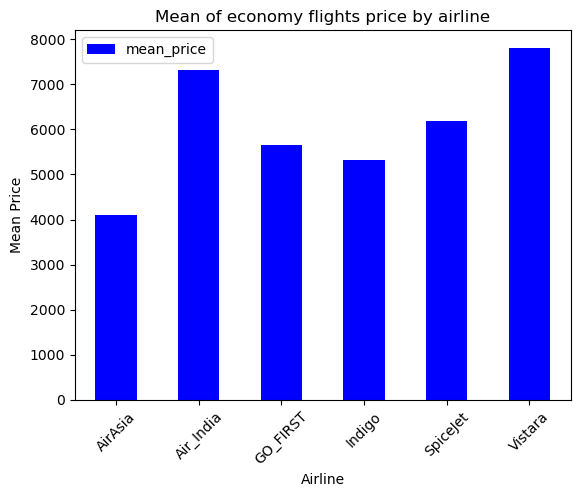

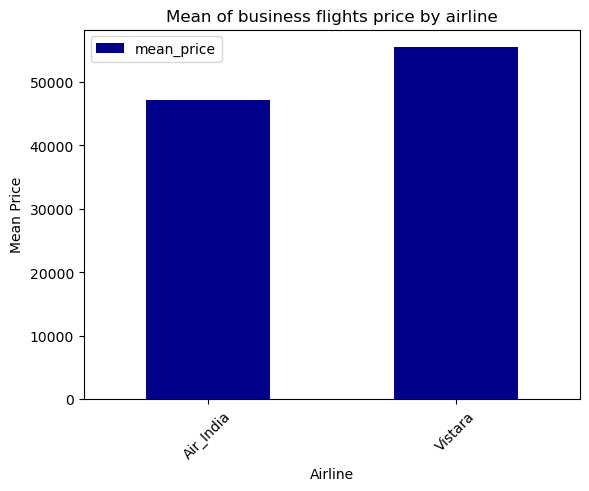

In [15]:
print('Mean of economy flights price by airline:')
economy_flights=df[df['class']=='Economy']
# print(economy_flights.head(10))
mean_price_by_airline_economy = economy_flights.groupby('airline').agg(mean_price=('price', 'mean'))
sorted_economy = mean_price_by_airline_economy.sort_values(by='mean_price', ascending=False)
print(sorted_economy.head(10))
print('-----------------------------------\n')

print('Mean of business flights price by airline:')
business_flights=df[df['class']=='Business']
mean_price_by_airline_business = business_flights.groupby('airline').agg(mean_price=('price', 'mean'))
sorted_business = mean_price_by_airline_business.sort_values(by='mean_price', ascending=False)
print(sorted_business.head(10))
print('-----------------------------------\n')

mean_price_by_airline_economy.plot(kind='bar', color='blue')
plt.title('Mean of economy flights price by airline')
plt.ylabel('Mean Price')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()

mean_price_by_airline_business.plot(kind='bar', color='darkblue')
plt.title('Mean of business flights price by airline')
plt.ylabel('Mean Price')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()

In [16]:
conclusion = '''
По данным графикам, можно сделать, что цена зависит от выбранной авиакомпании, так же можно сделать вывод, 
что не все авиакомпании предоставляют билет бизнес класса, следовательно гипотеза о зависимоти цены от авиакомпании полностью подтверждается
Ещё можно обратить внимание на то, что разница между средней ценой бизнес и эконом классов сильно отличается

Но тут же появляется другая гипотеза, что какие-то определенные авикомпании просто летают по другим маршрутам, и тут вопрос, цена разная из-за
наценки бренда (авикомпании), или из-за разницы в условиях
'''

print(conclusion)


По данным графикам, можно сделать, что цена зависит от выбранной авиакомпании, так же можно сделать вывод, 
что не все авиакомпании предоставляют билет бызнесс класса, следовательно гипотеза о зависимоти цены от авиакомпании полностью подтверждается
Ещё можно обратить внимание на то, что разница между средней ценой бизнес и эконом классов сильно отличается

Но тут же появляется другая гипотеза, что какие-то определенные авикомпании просто летают по другим маршрутам, и тут вопрос, цена разная из-за
наценки бренда (авикомпании), или из-за разницы в условиях



In [17]:
source_destination_df = df['source_city'] + ' ' + df['destination_city']
try:
    df_source_dest = df.insert(3, 'source_destination', source_destination_df)
except ValueError:
    pass

#source_destination_grouped_df = df.groupby('airline').agg(source_destination=('source_destination', lambda x: x))
#source_destination_grouped_df = df['source_destination'].value_counts()
#source_destination_grouped_df = df[['airline', 'source_destination']].sort_values('airline', ascending = True).value_counts()
source_destination_grouped_df = df.groupby(by=['airline', 'source_destination'], as_index=False).agg(mean_price=('price', 'mean'))
sort_by_price = source_destination_grouped_df.sort_values(by='mean_price', ascending=False).reset_index(drop=True)
#print(source_destination_grouped_df.shape)
#print(source_destination_grouped_df.head(30))
print('Count of unique flights by airline:', sort_by_price.shape[0], '\n')
print(sort_by_price.head(20))
#print(sort_by_price.tail(30))
#print(sort_by_price.index)

print('-----------------------------------\n')
source_destination_rule = 'Bangalore Kolkata'
print(f'Prices for flights by path: {source_destination_rule}')
rule = (sort_by_price['source_destination'] == source_destination_rule)
print(sort_by_price.loc[rule].head(10).reset_index(drop=True))
print('-----------------------------------\n')

Count of unique flights by airline: 177 

      airline source_destination    mean_price
0     Vistara  Bangalore Kolkata  35746.714874
1     Vistara      Delhi Kolkata  35702.441732
2     Vistara     Mumbai Kolkata  35223.862417
3     Vistara   Mumbai Bangalore  35029.880315
4     Vistara   Bangalore Mumbai  34961.383271
5     Vistara      Kolkata Delhi  33792.181332
6     Vistara  Kolkata Bangalore  33501.412807
7     Vistara     Kolkata Mumbai  33416.101911
8     Vistara     Chennai Mumbai  32662.127337
9     Vistara     Mumbai Chennai  32181.946251
10    Vistara  Kolkata Hyderabad  31536.746264
11    Vistara    Chennai Kolkata  31253.674127
12    Vistara      Chennai Delhi  31101.427262
13    Vistara    Kolkata Chennai  31039.621071
14    Vistara  Hyderabad Kolkata  30927.988404
15    Vistara      Delhi Chennai  30865.778716
16  Air_India  Chennai Bangalore  29786.121490
17    Vistara   Mumbai Hyderabad  29497.578017
18  Air_India  Bangalore Kolkata  29105.826259
19  Air_India    C

In [1]:
conclusion = '''
По анализу выше явно видно, что дорогие компании продают билеты на те же направления дороже, чем дешевые авиакомпании, значит цена зависит от бренда, а не от направления
'''

print(conclusion)


По анализу выше явно видно, что дорогие компании продают билеты на те же направления дороже, чем дешевые авиакомпании, значит цена зависит от бренда, а не от направления



## 3. Исследовать зависимость средней цены от количества дней до полёта.

In [20]:
df.sample(10)

,id_of_flight,airline,flight,source_destination,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
39687,39687,AirAsia,I5-787,Delhi Chennai,Delhi,Early_Morning,one,Night,Chennai,Economy,16.25,30,1998
17520,17520,AirAsia,I5-548,Delhi Bangalore,Delhi,Early_Morning,one,Afternoon,Bangalore,Economy,7.58,38,3090
12428,12428,Vistara,UK-975,Delhi Bangalore,Delhi,Early_Morning,one,Morning,Bangalore,Economy,5.00,14,10680
291956,291956,Vistara,UK-838,Chennai Mumbai,Chennai,Night,one,Evening,Mumbai,Business,19.42,27,49553
272302,272302,Vistara,UK-774,Kolkata Hyderabad,Kolkata,Night,one,Early_Morning,Hyderabad,Business,11.25,44,49207
277962,277962,Vistara,UK-870,Hyderabad Mumbai,Hyderabad,Night,one,Evening,Mumbai,Business,21.08,13,58315
266177,266177,Vistara,UK-720,Kolkata Mumbai,Kolkata,Early_Morning,one,Evening,Mumbai,Business,9.33,33,50271
225041,225041,Vistara,UK-651,Mumbai Delhi,Mumbai,Evening,one,Evening,Delhi,Business,24.42,2,53220
18431,18431,Indigo,6E-2331,Delhi Bangalore,Delhi,Early_Morning,one,Afternoon,Bangalore,Economy,6.58,42,3127
109782,109782,Vistara,UK-810,Bangalore Hyderabad,Bangalore,Early_Morning,one,Evening,Hyderabad,Economy,12.92,2,19774


<Figure size 600x1000 with 0 Axes>

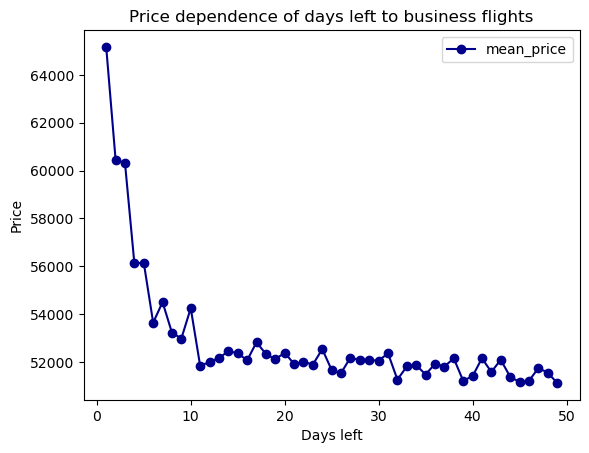

<Figure size 600x1000 with 0 Axes>

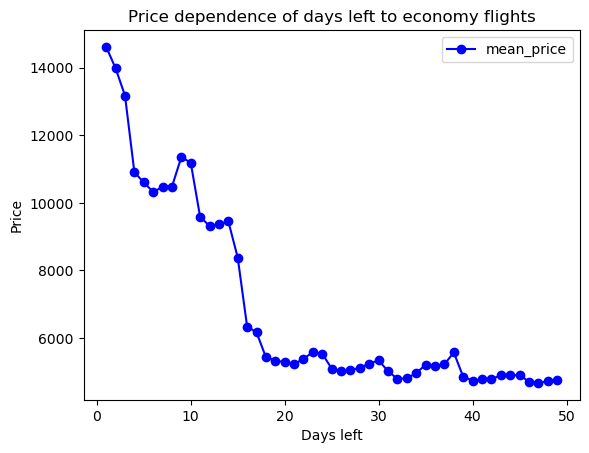

In [21]:
business_price_by_left_days=business_flights.groupby(by='days_left').agg(mean_price=('price', 'mean'))
economy_price_by_left_days=economy_flights.groupby(by='days_left').agg(mean_price=('price', 'mean'))



fig = plt.figure(figsize=(6, 10))
business_price_by_left_days.plot(color='darkblue', marker='o')
#business_price_by_left_days.plot(kind='bar', color='darkblue')
plt.title('Price dependence of days left to business flights')
plt.xlabel('Days left')
plt.ylabel('Price')
plt.show()

fig = plt.figure(figsize=(6, 10))
economy_price_by_left_days.plot(color='blue', marker='o')
#economy_price_by_left_days.plot(kind='bar', color='blue')
plt.title('Price dependence of days left to economy flights')
plt.xlabel('Days left')
plt.ylabel('Price')
plt.show()

In [22]:
conclusion = '''
Можно заметить тенденцию, что чем позже покупался билет, тем выше цена, но в процентном соотношении в бизнес классе разница ниже
Чтобы проверить гипотезу о том, на сколько дешевле цены при покупке заранее, я возьму максимальное значение цены и от него вычислю разницу
После этих манипуляций, можно будет наблюдать разницу в ценах

После этого изображу разницу в цене в процентах для наглядности
'''

print(conclusion)


Можно заметить тенденцию, что чем позже покупался билет, тем выше цена, но в процентном соотношении в бизнес классе разница ниже
Чтобы проверить гипотезу о том, на сколько дешевле цены при покупке заранее, я возьму максимальное значение цены и от него вычислю разницу
После этих манипуляций, можно будет наблюдать разницу в ценах

После этого изображу разницу в цене в процентах для наглядности



Dependence of left days to flight, business max price: 65169.31203007519


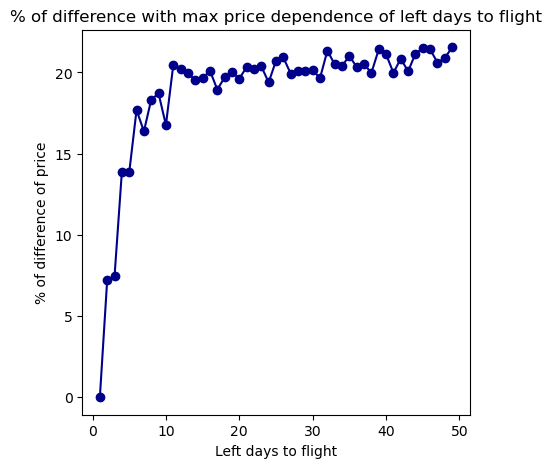

Dependence of left days to flight, economy max price: 14613.17940999398


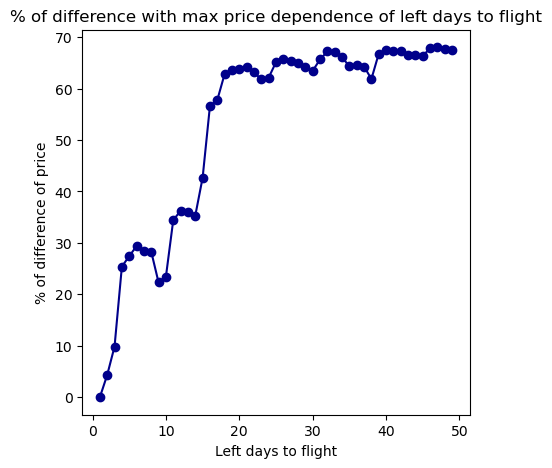

In [23]:
business_price_by_left_days=business_flights.groupby(by='days_left').agg(mean_price=('price', 'mean'))
economy_price_by_left_days=economy_flights.groupby(by='days_left').agg(mean_price=('price', 'mean'))

def show_graph(df_for_plot, name, x_label, y_label):
    fig = plt.figure(figsize=(5, 5))
    df_for_plot.plot(color='darkblue', marker='o')
    #business_price_by_left_days.plot(kind='bar', color='darkblue')
    plt.title(name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

max_price_bussines = business_price_by_left_days['mean_price'].max()
difference_of_price_to_max_business = business_price_by_left_days['mean_price'].apply(lambda x: max_price_bussines - x)
difference_of_price_to_max_business_prsntage = business_price_by_left_days['mean_price'].apply(lambda x: (1 - x/max_price_bussines)*100)

max_price_economy = economy_price_by_left_days['mean_price'].max()
difference_of_price_to_max_economy = economy_price_by_left_days['mean_price'].apply(lambda x: max_price_economy - x)
difference_of_price_to_max_economy_prsntage = economy_price_by_left_days['mean_price'].apply(lambda x: (1 - x/max_price_economy)*100)

print(f'Dependence of left days to flight, business max price: {max_price_bussines}')
#show_graph(difference_of_price_to_max_business, 'Difference with max price dependence of left days to flight', 'Left days to flight', 'Difference of price')
show_graph(difference_of_price_to_max_business_prsntage, '% of difference with max price dependence of left days to flight', 'Left days to flight', '% of difference of price')

print(f'Dependence of left days to flight, economy max price: {max_price_economy}')
#show_graph(difference_of_price_to_max_economy, 'Difference with max price dependence of left days to flight', 'Left days to flight', 'Difference of price')
show_graph(difference_of_price_to_max_economy_prsntage, '% of difference with max price dependence of left days to flight', 'Left days to flight', '% of difference of price')

In [2]:
conclusion = '''
Было принято решение убрать график разницы в цене, так как фактически это тоже самое, что и первые два графика, вот график в цене оставил,
на нем видны интересные результаты, максимальный процент повышения в бизнес классе 20%, а вот в экономе чуть меньше 70%
'''

print(conclusion)


Было принято решение убрать график разницы в цене, так как фактически это тоже самое, что и первые два графика, вот график в цене оставил,
на нем видны интересные результаты, максимальный процент повышения в бизнес классе 20%, а вот в экономе чуть меньше 70%



### 4. Исследовать зависимость средней цены полёта от его продолжительности.

In [26]:
df.sample(10)

,id_of_flight,airline,flight,source_destination,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
111630,111630,AirAsia,I5-972,Bangalore Hyderabad,Bangalore,Evening,zero,Evening,Hyderabad,Economy,1.33,19,1714
253290,253290,Air_India,AI-503,Bangalore Kolkata,Bangalore,Evening,one,Morning,Kolkata,Business,15.17,9,60508
156723,156723,Indigo,6E-2349,Hyderabad Delhi,Hyderabad,Night,zero,Late_Night,Delhi,Economy,2.25,36,3191
178850,178850,Air_India,AI-525,Hyderabad Chennai,Hyderabad,Early_Morning,one,Night,Chennai,Economy,17.17,31,4752
137044,137044,Vistara,UK-772,Kolkata Bangalore,Kolkata,Morning,one,Morning,Bangalore,Economy,22.42,13,10961
78585,78585,Vistara,UK-910,Mumbai Chennai,Mumbai,Evening,one,Morning,Chennai,Economy,16.33,11,11129
244279,244279,Vistara,UK-940,Mumbai Chennai,Mumbai,Evening,one,Morning,Chennai,Business,14.17,40,64173
102668,102668,GO_FIRST,G8-801,Bangalore Mumbai,Bangalore,Early_Morning,one,Evening,Mumbai,Economy,9.92,49,4354
279819,279819,Vistara,UK-860,Hyderabad Mumbai,Hyderabad,Early_Morning,one,Night,Mumbai,Business,14.42,41,68507
193525,193525,Vistara,UK-826,Chennai Mumbai,Chennai,Afternoon,zero,Afternoon,Mumbai,Economy,2.00,47,2960


<Figure size 1000x500 with 0 Axes>

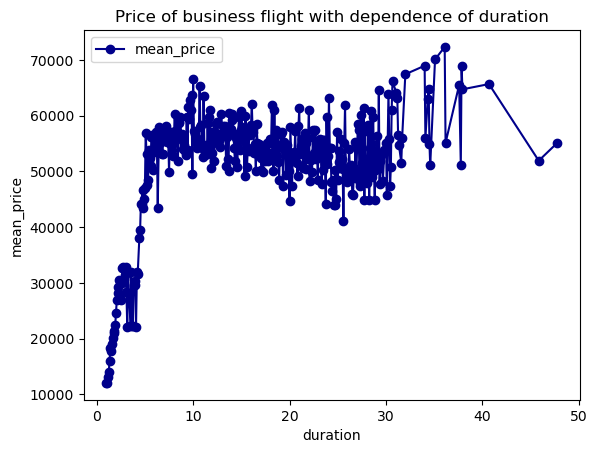

<Figure size 1000x500 with 0 Axes>

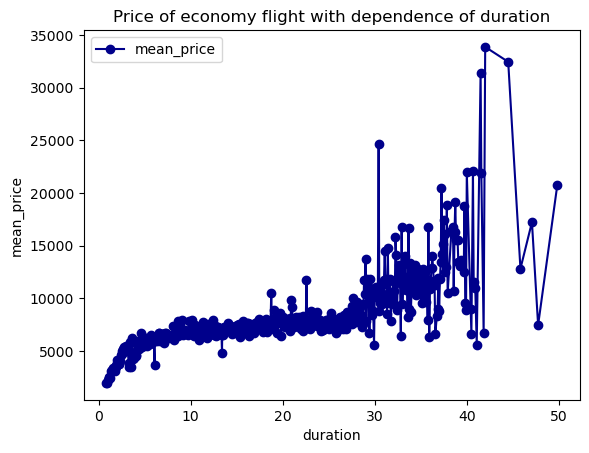

In [27]:
mean_price_by_duration_business = business_flights.groupby(by='duration').agg(mean_price=('price', 'mean'))
mean_price_by_duration_economy = economy_flights.groupby(by='duration').agg(mean_price=('price', 'mean'))

def show_graph(df_for_plot, name, x_label, y_label):
    fig = plt.figure(figsize=(10, 5))
    df_for_plot.plot(color='darkblue', marker='o')
    #business_price_by_left_days.plot(kind='bar', color='darkblue')
    plt.title(name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

show_graph(mean_price_by_duration_business, 'Price of business flight with dependence of duration', 'duration', 'mean_price')
show_graph(mean_price_by_duration_economy, 'Price of economy flight with dependence of duration', 'duration', 'mean_price')

In [28]:
conclusion = '''
Можно заметить тенденцию, что в бизнес классе цена билета выше, если лететь дольше и это тенденция довольно ровная
В эконом классе график достаточно плавно поднимается, но остаётся тенденция, что чем дольше лететь, тем дороже

В графике бизнес класса, скачок довольно резкий и после этого тенденция устойчива
Тут появляется гипотеза, что чем дольше едешь, тем дольше кайфа, соответвенно плати больше, но не совсем понятен скачок,
если полет больше примерно 5 часов цена взлетает на 20.000 единиц, возможно тут виновата политика компании перевозчика,
ведь как известно бизнес перевозками занимается только две компании, тут вполне возможно сыграли их монополистические порядки
'''

print(conclusion)


Можно заметить тенденцию, что в бизнес классе цена билета выше, если лететь дольше и это тенденция довольно ровная
В эконом классе график достаточно плавно поднимается, но остаётся тенденция, что чем дольше лететь, тем дороже

В графике бизнес класса, скачок довольно резкий и после этого тенденция устойчива
Тут появляется гипотеза, что чем дольше едешь, тем дольше кайфа, соответвенно плати больше, но не совсем понятен скачок,
если полет больше примерно 5 часов цена взлетает на 20.000 единиц, возможно тут виновата политика компании перевозчика,
ведь как известно бизнес перевозками занимается только две компании, тут вполне возможно сыграли их монополистические порядки



### 5. Узнать, как меняется цена при изменении города вылета и пункта назначения?

In [30]:
df.sample(10)

,id_of_flight,airline,flight,source_destination,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
11046,11046,Air_India,AI-678,Delhi Bangalore,Delhi,Morning,one,Morning,Bangalore,Economy,26.17,7,10680
182865,182865,Air_India,AI-569,Chennai Delhi,Chennai,Early_Morning,one,Night,Delhi,Economy,14.08,20,3916
22386,22386,SpiceJet,SG-1072,Delhi Kolkata,Delhi,Night,zero,Night,Kolkata,Economy,2.17,15,4000
109420,109420,AirAsia,I5-741,Bangalore Kolkata,Bangalore,Morning,one,Night,Kolkata,Economy,11.83,48,3393
151435,151435,Vistara,UK-720,Kolkata Chennai,Kolkata,Early_Morning,one,Evening,Chennai,Economy,9.17,37,6009
92078,92078,Vistara,UK-858,Bangalore Delhi,Bangalore,Early_Morning,one,Evening,Delhi,Economy,13.08,40,4796
23219,23219,GO_FIRST,G8-2513,Delhi Kolkata,Delhi,Evening,one,Early_Morning,Kolkata,Economy,15.00,19,5954
63349,63349,SpiceJet,SG-455,Mumbai Kolkata,Mumbai,Afternoon,one,Night,Kolkata,Economy,5.92,12,12349
16185,16185,SpiceJet,SG-8171,Delhi Bangalore,Delhi,Morning,one,Morning,Bangalore,Economy,21.00,31,6427
41458,41458,Air_India,AI-624,Delhi Chennai,Delhi,Evening,one,Early_Morning,Chennai,Economy,12.33,40,3988


In [31]:
print('Unique source city: ', df['source_city'].unique().size)
print('Unique destination city: ', df['destination_city'].unique().size)

Unique source city:  6
Unique destination city:  6


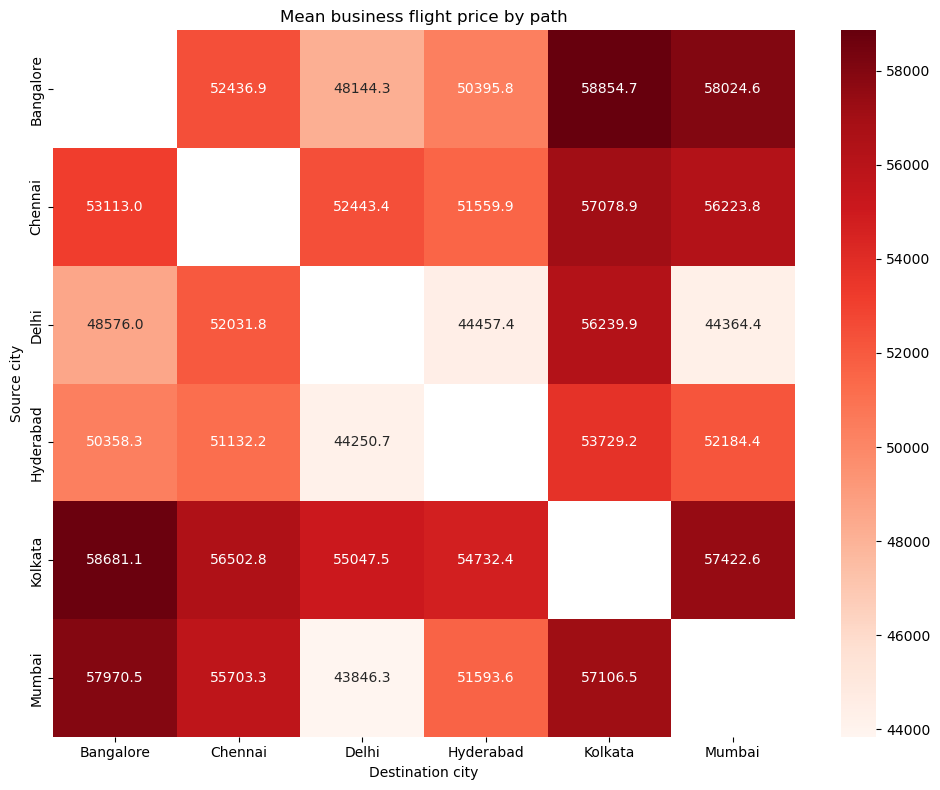

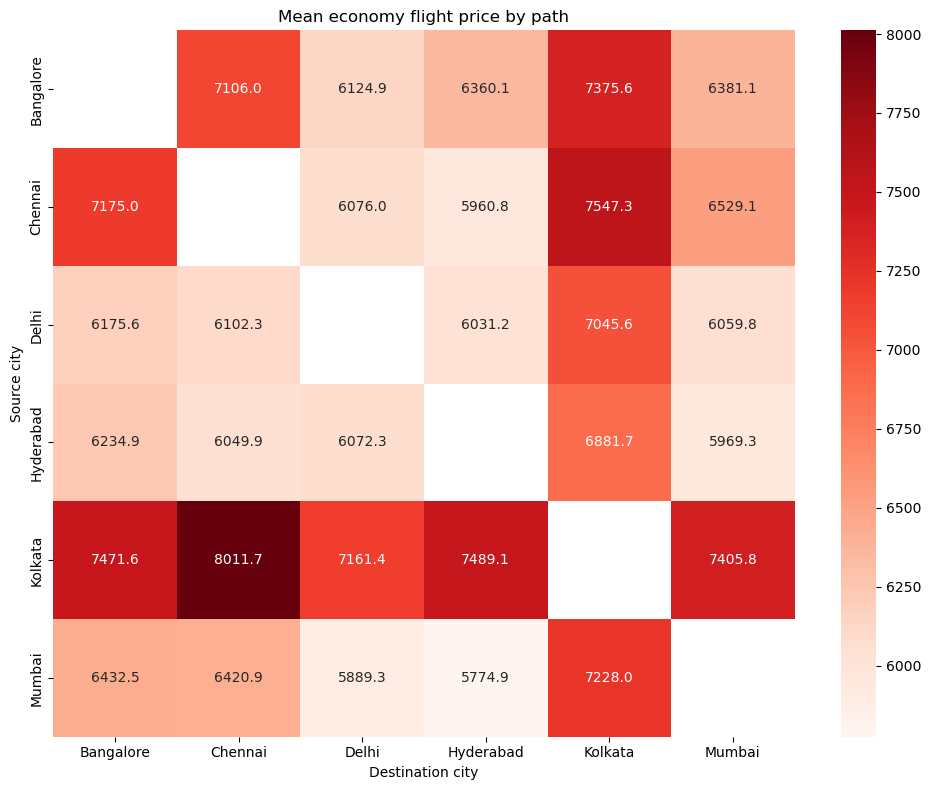

In [32]:
mean_price_by_path_business = business_flights.groupby(by=['source_city', 'destination_city'])['price'].mean().unstack()
mean_price_by_path_economy = economy_flights.groupby(by=['source_city', 'destination_city'])['price'].mean().unstack()

# print(mean_price_by_path_business)

plt.figure(figsize=(10, 8))
sns.heatmap(mean_price_by_path_business, cmap='Reds', annot=True, fmt=".1f")
plt.title('Mean business flight price by path')
plt.xlabel('Destination city')
plt.ylabel('Source city')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(mean_price_by_path_economy, cmap='Reds', annot=True, fmt=".1f")
plt.title('Mean economy flight price by path')
plt.xlabel('Destination city')
plt.ylabel('Source city')

plt.tight_layout()
plt.show()

### 6. С помощью инструментов машинного обучения предсказать стоимость перелёта.
Если будете использовать несколько моделей, то провести сравнения обученных моделей, выбрать наилучшую (не забывайте про возможность переобучения моделей. Разница между полученными значениями на тренировочной и тестовой выборках не должна превышать 150–200 единиц).

In [34]:
df.sample(10)

,id_of_flight,airline,flight,source_destination,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
50751,50751,Indigo,6E-6004,Mumbai Delhi,Mumbai,Evening,zero,Night,Delhi,Economy,2.08,40,2339
50295,50295,Vistara,UK-821,Mumbai Delhi,Mumbai,Early_Morning,one,Evening,Delhi,Economy,13.17,37,10895
7106,7106,Air_India,AI-9843,Delhi Mumbai,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,9.75,36,3564
87323,87323,Air_India,AI-610,Bangalore Delhi,Bangalore,Evening,one,Evening,Delhi,Economy,24.17,18,4294
166556,166556,Vistara,UK-878,Hyderabad Bangalore,Hyderabad,Afternoon,one,Night,Bangalore,Economy,9.75,12,15204
286604,286604,Vistara,UK-880,Hyderabad Chennai,Hyderabad,Afternoon,one,Night,Chennai,Business,6.83,29,51707
289360,289360,Vistara,UK-824,Chennai Delhi,Chennai,Night,one,Afternoon,Delhi,Business,17.58,32,57920
201723,201723,Indigo,6E-156,Chennai Kolkata,Chennai,Night,one,Early_Morning,Kolkata,Economy,8.92,41,2359
22674,22674,AirAsia,I5-1529,Delhi Kolkata,Delhi,Morning,one,Evening,Kolkata,Economy,9.67,16,6443
139928,139928,Air_India,AI-770,Kolkata Bangalore,Kolkata,Night,one,Afternoon,Bangalore,Economy,15.75,32,7053


In [35]:
# df.drop(['id_of_flight', 'source_destination'])
work_df = df.drop(['id_of_flight', 'source_destination'], axis=1)

business_flights = work_df[work_df['class']=='Business'].reset_index(drop=True)
economy_flights = work_df[work_df['class']=='Economy'].reset_index(drop=True)

business_flights = business_flights.drop('class', axis=1)
economy_flights = economy_flights.drop('class', axis=1)

thought = '''
Я не буду отходить от своего направления, так что я разделю и обучу две модели, которые будут определять цену для бизнес
класс и для эконома отдельно, мне кажется от этого модель будет точнее

Параметр класса будет отпределяться на входе, то есть при предсказании сначала тянется класс, 
а уже после выбирается модель по которой будет делаться предсказание
'''
print(thought)


Я не буду отходить от своего направления, так что я разделю и обучу две модели, которые будут определять цену для бизнес
класс и для эконома отдельно, мне кажется от этого модель будет точнее

Параметр класса будет отпределяться на входе, то есть при предсказании сначала тянется класс, 
а уже после выбирается модель по которой будет делаться предсказание



In [ ]:
# Обучения определения цены для бизнес класса
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error

# business_flights - df с которым мы работаем
ratio_of_quantile = 0.9 # квантиль нужен для нахождения выбросов

business_flights['log_price'] = np.log(business_flights['price'])
business_flights = business_flights[business_flights['log_price'] < business_flights['log_price'].quantile(ratio_of_quantile)]

# Расформировали данные на тренировочные и тестовые
features_business = business_flights.drop(['price', 'log_price'], axis=1)
target_business = business_flights['log_price']

# Нужно все категориальные данные преобразовать с помощью LabelEncoder, а потом оформатировать с помощью StandardScaler (можно простестить с MinMaxScaler)
label_encoder = OrdinalEncoder()
business_df_to_label_encode = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']
features_business[business_df_to_label_encode] = label_encoder.fit_transform(features_business[business_df_to_label_encode])
# features_business['destination_city'].unique().size
#print(features_business)

# Юзаем StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(features_business)
features_business = standard_scaler.transform(features_business)
# print(features_business)

features_business_train, features_business_test, target_business_train, target_business_test = train_test_split(features_business, target_business, test_size=0.2, random_state=50)

#DecisionTreeRegressor
param_grid_tree = {
    'max_depth': [25],
    'min_samples_split': [85],
    'min_samples_leaf': [3]
}

dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_model, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(features_business_train, target_business_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [25], 'min_samples_leaf': [3],
                         'min_samples_split': [85]},
             scoring='neg_mean_squared_error')

In [37]:
#DecisionTreeRegressor
pred_lr_train_business_DTR = np.exp(grid_search.predict(features_business_train))
pred_lr_business_DTR = np.exp(grid_search.predict(features_business_test))

print('RMSE for business class DTR:')

rmse_lr_train_business_DTR = mean_squared_error(np.exp(target_business_train), pred_lr_train_business_DTR) ** 0.5
rmse_lr_business_DTR = mean_squared_error(np.exp(target_business_test), pred_lr_business_DTR) ** 0.5

print('RMSE train DTR:', rmse_lr_train_business_DTR)
print('RMSE test DTR:', rmse_lr_business_DTR)
print('\n\nВремя: 5.19, Дата: 03.11.2024, Бортовой компьютер, я устал, но остался ещё эконом класс :(, зачем люди им летают')

RMSE for business class DTR:
RMSE train DTR: 2492.5303780660306
RMSE test DTR: 2650.6235880113572


Время: 5.19, Дата: 03.11.2024, Бортовой компьютер, я устал, но остался ещё эконом класс :(, зачем люди им летают


In [ ]:
# Обучения определения цены для эконом класса

# economy_flights - df с которым мы работаем
ratio_of_quantile = 0.9 # квантиль нужен для нахождения выбросов

economy_flights['log_price'] = np.log(economy_flights['price'])
economy_flights = economy_flights[economy_flights['log_price'] < economy_flights['log_price'].quantile(ratio_of_quantile)]

# Расформировали данные на тренировочные и тестовые
features_economy = economy_flights.drop(['price', 'log_price'], axis=1)
target_economy = economy_flights['log_price']

# Нужно все категориальные данные преобразовать с помощью LabelEncoder, а потом оформатировать с помощью StandardScaler (можно простестить с MinMaxScaler)
label_encoder = OrdinalEncoder()
economy_df_to_label_encode = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']
features_economy[economy_df_to_label_encode] = label_encoder.fit_transform(features_economy[economy_df_to_label_encode])
# features_economy['destination_city'].unique().size
#print(features_economy)

# Юзаем StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(features_economy)
features_economy = standard_scaler.transform(features_economy)
# print(features_economy)

features_economy_train, features_economy_test, target_economy_train, target_economy_test = train_test_split(features_economy, target_economy, test_size=0.2, random_state=50)

#DecisionTreeRegressor
param_grid_tree = {
    'max_depth': [25],
    'min_samples_split': [85],
    'min_samples_leaf': [3]
}

dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_model, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(features_economy_train, target_economy_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [25], 'min_samples_leaf': [3],
                         'min_samples_split': [85]},
             scoring='neg_mean_squared_error')

In [39]:
#DecisionTreeRegressor
pred_lr_train_economy_DTR = np.exp(grid_search.predict(features_economy_train))
pred_lr_economy_DTR = np.exp(grid_search.predict(features_economy_test))

print('RMSE for economy class DTR:')

rmse_lr_train_economy_DTR = mean_squared_error(np.exp(target_economy_train), pred_lr_train_economy_DTR) ** 0.5
rmse_lr_economy_DTR = mean_squared_error(np.exp(target_economy_test), pred_lr_economy_DTR) ** 0.5

print('RMSE train DTR:', rmse_lr_train_economy_DTR)
print('RMSE test DTR:', rmse_lr_economy_DTR)

RMSE for economy class DTR:
RMSE train DTR: 818.0077836007368
RMSE test DTR: 862.5917151703668


In [ ]:
# Общее
ratio_of_quantile = 0.90 # квантиль нужен для нахождения выбросов

df = df.drop('source_destination', axis=1)
df['log_price'] = np.log(df['price'])
df = df[df['log_price'] < df['log_price'].quantile(ratio_of_quantile)]

# Расформировали данные на тренировочные и тестовые
features = df.drop(['price', 'log_price'], axis=1)
target = df['log_price']

# Нужно все категориальные данные преобразовать с помощью LabelEncoder, а потом оформатировать с помощью StandardScaler (можно простестить с MinMaxScaler)
label_encoder = OrdinalEncoder()
df_to_label_encode = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
features[df_to_label_encode] = label_encoder.fit_transform(features[df_to_label_encode])
# features['destination_city'].unique().size
#print(features)

# Юзаем StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(features)
features = standard_scaler.transform(features)
# print(features)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=50)

#DecisionTreeRegressor
param_grid_tree = {
    'max_depth': [25],
    'min_samples_split': [85],
    'min_samples_leaf': [3]
}

dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_model, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [25], 'min_samples_leaf': [3],
                         'min_samples_split': [85]},
             scoring='neg_mean_squared_error')

In [41]:
#DecisionTreeRegressor
print(len(features))
pred_lr_train_DTR = np.exp(grid_search.predict(features_train))
pred_lr_DTR = np.exp(grid_search.predict(features_test))

print('RMSE DTR:')

rmse_lr_train_DTR = mean_squared_error(np.exp(target_train), pred_lr_train_DTR) ** 0.5
rmse_lr_DTR = mean_squared_error(np.exp(target_test), pred_lr_DTR) ** 0.5

print('RMSE train DTR:', rmse_lr_train_DTR)
print('RMSE test DTR:', rmse_lr_DTR)

269688
RMSE DTR:
RMSE train DTR: 1578.6714654449906
RMSE test DTR: 1771.9088431062103


### 7. Напишите вывод о проделанной работе, опишите EDA и результат обучения моделей.
(Для выполнения задания необходимо получить RMSE не более 3350 на тестовой выборке)

In [3]:
conclusion = '''
По традиции, conclusion
Мне очень понравилось обучать модельки, анализировать данные и находить закономерности, хотелось ещё глубже покапаться

По поводу результатов, у меня, скорее всего, они будут отличаться от других, так как я пошела немного другим путем решения, по итогу,
ну так вот rmse для эконома 862, для бизнеса 2649, вполне не плохо я считаю, игралась с гиперпараметрами (горе инженер)
В следующих работах постараюсь проделать анализ после обучения и поискать в этом закономерности

В конце решила посчитать общий RMSE, шок был получен, может быть я что-то сделала не так, буду ждать фидбэка
RMSE train DTR: 1578.6717296231418
RMSE test DTR: 1769.202933216888

Ещё заметила, что видимо из-за того, что я изначально обучала модельку без классов внутри датасета, при удалении их из фрейма RMSE
меняется совсем незначительно

В целом всё, спасибо за внимание
'''

print(conclusion)


По традиции, conclusion
Мне очень понравилось обучать модельки, анализировать данные и находить закономерности, хотелось ещё глубже покапаться

По поводу результатов, у меня, скорее всего, они будут отличаться от других, так как я пошела немного другим путем решения, по итогу,
ну так вот rmse для эконома 862, для бизнеса 2649, вполне не плохо я считаю, игралась с гиперпараметрами (горе инженер)
В следующих работах постараюсь проделать анализ после обучения и поискать в этом закономерности

В конце решила посчитать общий RMSE, шок был получен, может быть я что-то сделала не так, буду ждать фидбэка
RMSE train DTR: 1578.6717296231418
RMSE test DTR: 1769.202933216888

Ещё заметила, что видимо из-за того, что я изначально обучала модельку без классов внутри датасета, при удалении их из фрейма RMSE
меняется совсем незначительно

В целом всё, спасибо за внимание

